In [340]:
import matplotlib.pyplot as plt
import pandas as pd

In [341]:
path = r"D:\Youlin Zhu\2021实验室\分子动力学\数据处理\strainrate\sample40"
outfig = "strainrate40.tiff"

In [342]:
df = pd.read_excel(path+"/"+"cut.xlsx",sheet_name=0, header=0,index_col=0)

In [343]:
goal_xaxis="Coord1"
goal_yaxis="c_vx[1]"
Tsp=df.loc[:].idxmin()["v_pressurexx"]#定位时刻，可手动改为 XX (ps)
Fsp=df.loc[:].min()["v_pressurexx"]#定位最大拉应力

print("层裂时刻为{}ps,层裂强度为{}GPa".format(Tsp,Fsp/10000))

层裂时刻为11.2ps,层裂强度为-13.2665GPa


In [344]:
df1=pd.read_excel(path+"/"+"cut.xlsx",sheet_name=0, header=0)
m=df1.loc[:].idxmin()["v_pressurexx"]

In [345]:
p=df1.loc[m,"Coord1"]
p1=df1.loc[m-1,'Coord1']
p2=df1.loc[m+1,'Coord1']
v1=df1.loc[m-1,'c_vx[1]']
v2=df1.loc[m+1,'c_vx[1]']
strain_rate=(v2-v1)/(p2-p1)
print("层裂位置为{:.3f}nm附近,应变率为{:.3f}*10^10".format(p,strain_rate*1000))

层裂位置为387.904nm附近,应变率为33.246*10^10


In [346]:
xaxis=df.loc[Tsp,goal_xaxis].values
yaxis=df.loc[Tsp,goal_yaxis].values

Text(0, 0.5, 'Velocity Z (km/s)')

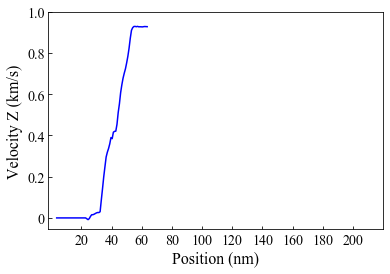

In [347]:
plt.figure(num=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(xaxis,yaxis,color='blue',linewidth=1.5)

#plt.ylim()
plt.xticks([200,400,600,800,1000,1200,1400,1600,1800,2000],[20,40,60,80,100,120,140,160,180,200],fontproperties = 'Times New Roman',size = 14)
plt.xlim(-20,2200)
plt.yticks([0,2,4,6,8,10],[0,0.2,0.4,0.6,0.8,1.0],fontproperties = 'Times New Roman',size = 14)
plt.xlabel("Position (nm)",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Velocity Z (km/s)",fontdict={'family' : 'Times New Roman', 'size'   : 16})
#plt.savefig(path+"/"+outfig,dpi=600)